In [2]:
import requests
from bs4 import BeautifulSoup

In [3]:
url = "https://fbref.com/en/squads/18bb7c10/2002-2003/Arsenal-Stats"
html_page = requests.get(url)

In [5]:
soup = BeautifulSoup(html_page.content, "html.parser")


<bound method Tag.prettify of 
<!DOCTYPE html>

<html class="no-js" data-root="/home/fb/deploy/www/base" data-version="klecko-" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport">
<link href="https://cdn.ssref.net/req/202303231" rel="dns-prefetch"/>
<!-- Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) -->
<script async="true" type="text/javascript">
    (function() {
	var host = window.location.hostname;
	var element = document.createElement('script');
	var firstScript = document.getElementsByTagName('script')[0];
	var url = 'https://cmp.quantcast.com'
	    .concat('/choice/', 'XwNYEpNeFfhfr', '/', host, 
		    '/choice.js?tag_version=V2');
	var uspTries = 0;
	var uspTriesLimit = 3;
	element.async = true;
	element.type = 'text/javascript';
	element.src = url;
	
	firstScript.parentNode.insertBefore(element, firstScript);
	
	function makeStub() {

In [45]:
warning = soup.select("div#div_results2002-200391_overall")[0]
warning

<div class="table_container tabbed current" id="div_results2002-200391_overall">
<table class="stats_table sortable min_width force_mobilize" data-cols-to-freeze=",2" id="results2002-200391_overall"> <caption>Regular season, Premier League Table</caption> <colgroup><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/></colgroup> <thead> <tr> <th aria-label="Rank" class="poptip sort_default_asc center" data-stat="rank" data-tip="&lt;strong&gt;Rank&lt;/strong&gt;&lt;br&gt;Squad finish in competition&lt;br&gt;Finish within the league or competition.&lt;br&gt;For knockout competitions may show final round reached.&lt;br&gt;Colors and arrows represent promotion/relegation or qualifiation for continental cups.&lt;br&gt;Trophy indicates team won league whether by playoffs or by leading the table.&lt;br&gt;Star indicates topped table in league USING another means of naming champion." scope="col">Rk</th> <th aria-label="Squad" class="poptip sort_default_asc 

In [36]:
columns = warning.find('thead').find_all('th') 


In [39]:
import pandas as pd
table_df = pd.read_html(str(warning))[0] 

In [40]:
table_df

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Manchester Utd,38,25,8,5,74,34,40,83,2.18,67602,Ruud van Nistelrooy - 25,Fabien Barthez,→ Champions League via league finish
1,2,Arsenal,38,23,9,6,85,42,43,78,2.05,38042,Thierry Henry - 24,David Seaman,→ Champions League via league finish
2,3,Newcastle Utd,38,21,6,11,63,48,15,69,1.82,51923,Alan Shearer - 17,Shay Given,→ Champions League via league finish
3,4,Chelsea,38,19,10,9,68,38,30,67,1.76,39784,Gianfranco Zola - 14,Carlo Cudicini,→ Champions League via league finish


In [65]:
years = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
2015, 2016, 2017, 2018, 2019, 2020, 2021]


In [66]:
data = []
for i, yr in enumerate(years):
    url = f"https://fbref.com/en/squads/18bb7c10/{yr}-{yr+1}/Arsenal-Stats"
    html_page = requests.get(url)
    soup = BeautifulSoup(html_page.content, "html.parser")
    warning = soup.select(f"div#div_results{yr}-{yr+1}91_overall")[0]
    data.append(warning)

In [67]:
table_df = pd.read_html(str(data[0]))[0]
table_df

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Manchester Utd,38,24,8,6,79,31,48,80,2.11,67489,Teddy Sheringham - 15,Fabien Barthez,→ Champions League via league finish
1,2,Arsenal,38,20,10,8,63,38,25,70,1.84,37974,Thierry Henry - 17,David Seaman,→ Champions League via league finish
2,3,Liverpool,38,20,9,9,71,39,32,69,1.82,43698,Michael Owen - 16,Sander Westerveld,→ Champions League via league finish
3,4,Leeds United,38,20,8,10,64,43,21,68,1.79,38974,Mark Viduka - 17,Nigel Martyn,→ UEFA Cup via league finish


In [68]:
table = []
for i in range(len(data)):
    df = pd.read_html(str(data[i]))[0]
    table.append(df)



In [69]:
results = pd.concat(table)
results.tail(30)

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,Attendance,Top Team Scorer,Goalkeeper,Notes,xG,xGA,xGD,xGD/90
0,3,Manchester City,38,23,9,6,80,39,41,78,2.05,54019,Sergio Agüero - 20,Claudio Bravo,→ Champions League via league finish,NaN,NaN,NaN,NaN
1,4,Liverpool,38,22,10,6,78,42,36,76,2.00,53016,"Philippe Coutinho, Sadio Mané - 13",Simon Mignolet,→ Champions League via league finish,NaN,NaN,NaN,NaN
2,5,Arsenal,38,23,6,9,77,44,33,75,1.97,59957,Alexis Sánchez - 24,Petr Čech,→ Europa League via cup win 1,NaN,NaN,NaN,NaN
3,6,Manchester Utd,38,18,15,5,54,29,25,69,1.82,75290,Zlatan Ibrahimović - 17,David de Gea,→ Champions League via Europa League win,NaN,NaN,NaN,NaN
4,7,Everton,38,17,10,11,62,44,18,61,1.61,39047,Romelu Lukaku - 25,Joel Robles,→ Europa League via league finish,NaN,NaN,NaN,NaN
0,4,Liverpool,38,21,12,5,84,38,46,75,1.97,53049,Mohamed Salah - 32,"Loris Karius, Simon Mignolet",→ Champions League via league finish,72.9,33.8,39.1,1.03
1,5,Chelsea,38,21,7,10,62,38,24,70,1.84,41282,Eden Hazard - 12,Thibaut Courtois,→ Europa League via cup win 1,54.4,33.8,20.6,0.54
2,6,Arsenal,38,19,6,13,74,51,23,63,1.66,59323,Alexandre Lacazette - 14,Petr Čech,→ Europa League via league finish,68.3,47.8,20.5,0.54
3,7,Burnley,38,14,12,12,36,39,-3,54,1.42,20688,Chris Wood - 10,Nick Pope,→ Europa League via league finish 2,32.3,51.2,-18.9,-0.50
4,8,Everton,38,13,10,15,44,58,-14,49,1.29,38797,Wayne Rooney - 10,Jordan Pickford,NaN,40.5,52.4,-11.9,-0.31


In [72]:
Arsenal = results.loc[(results.Squad == "Arsenal")]
Arsenal

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,Attendance,Top Team Scorer,Goalkeeper,Notes,xG,xGA,xGD,xGD/90
1,2,Arsenal,38,20,10,8,63,38,25,70,1.84,37974,Thierry Henry - 17,David Seaman,→ Champions League via league finish,NaN,NaN,NaN,NaN
0,1,Arsenal,38,26,9,3,79,36,43,87,2.29,38055,Thierry Henry - 24,David Seaman,→ Champions League via league finish,NaN,NaN,NaN,NaN
1,2,Arsenal,38,23,9,6,85,42,43,78,2.05,38042,Thierry Henry - 24,David Seaman,→ Champions League via league finish,NaN,NaN,NaN,NaN
0,1,Arsenal,38,26,12,0,73,26,47,90,2.37,38079,Thierry Henry - 30,Jens Lehmann,→ Champions League via league finish,NaN,NaN,NaN,NaN
1,2,Arsenal,38,25,8,5,87,36,51,83,2.18,37979,Thierry Henry - 25,Jens Lehmann,→ Champions League via league finish,NaN,NaN,NaN,NaN
2,4,Arsenal,38,20,7,11,68,31,37,67,1.76,38184,Thierry Henry - 27,Jens Lehmann,→ Champions League via league finish,NaN,NaN,NaN,NaN
2,4,Arsenal,38,19,11,8,63,35,28,68,1.79,60140,Robin van Persie - 11,Jens Lehmann,→ Champions League via league finish,NaN,NaN,NaN,NaN
2,3,Arsenal,38,24,11,3,74,31,43,83,2.18,60070,Emmanuel Adebayor - 24,Manuel Almunia,→ Champions League via league finish,NaN,NaN,NaN,NaN
2,4,Arsenal,38,20,12,6,68,37,31,72,1.89,60040,Robin van Persie - 11,Manuel Almunia,→ Champions League via league finish,NaN,NaN,NaN,NaN
2,3,Arsenal,38,23,6,9,83,41,42,75,1.97,59927,Cesc Fàbregas - 15,Manuel Almunia,→ Champions League via league finish,NaN,NaN,NaN,NaN


In [75]:
import warnings
warnings.filterwarnings("ignore")
Arsenal["Year"] = [i+1 for i in years]

In [77]:
Arsenal

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,Attendance,Top Team Scorer,Goalkeeper,Notes,xG,xGA,xGD,xGD/90,Year
1,2,Arsenal,38,20,10,8,63,38,25,70,1.84,37974,Thierry Henry - 17,David Seaman,→ Champions League via league finish,NaN,NaN,NaN,NaN,2001
0,1,Arsenal,38,26,9,3,79,36,43,87,2.29,38055,Thierry Henry - 24,David Seaman,→ Champions League via league finish,NaN,NaN,NaN,NaN,2002
1,2,Arsenal,38,23,9,6,85,42,43,78,2.05,38042,Thierry Henry - 24,David Seaman,→ Champions League via league finish,NaN,NaN,NaN,NaN,2003
0,1,Arsenal,38,26,12,0,73,26,47,90,2.37,38079,Thierry Henry - 30,Jens Lehmann,→ Champions League via league finish,NaN,NaN,NaN,NaN,2004
1,2,Arsenal,38,25,8,5,87,36,51,83,2.18,37979,Thierry Henry - 25,Jens Lehmann,→ Champions League via league finish,NaN,NaN,NaN,NaN,2005
2,4,Arsenal,38,20,7,11,68,31,37,67,1.76,38184,Thierry Henry - 27,Jens Lehmann,→ Champions League via league finish,NaN,NaN,NaN,NaN,2006
2,4,Arsenal,38,19,11,8,63,35,28,68,1.79,60140,Robin van Persie - 11,Jens Lehmann,→ Champions League via league finish,NaN,NaN,NaN,NaN,2007
2,3,Arsenal,38,24,11,3,74,31,43,83,2.18,60070,Emmanuel Adebayor - 24,Manuel Almunia,→ Champions League via league finish,NaN,NaN,NaN,NaN,2008
2,4,Arsenal,38,20,12,6,68,37,31,72,1.89,60040,Robin van Persie - 11,Manuel Almunia,→ Champions League via league finish,NaN,NaN,NaN,NaN,2009
2,3,Arsenal,38,23,6,9,83,41,42,75,1.97,59927,Cesc Fàbregas - 15,Manuel Almunia,→ Champions League via league finish,NaN,NaN,NaN,NaN,2010


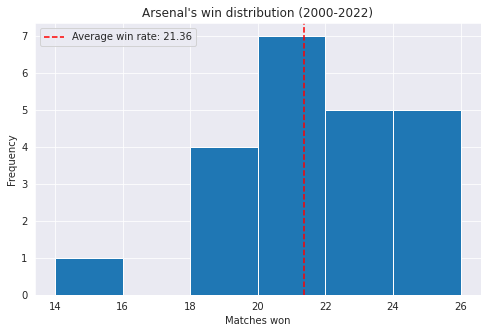

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(8,5))
Arsenal.W.hist(bins="auto", ax=ax)
ax.axvline(Arsenal.W.mean(), color="red", ls="--",
label=f"Average win rate: {round(Arsenal.W.mean(), 2)}")
ax.set(title="Arsenal's win distribution (2000-2022)",
xlabel = "Matches won", ylabel="Frequency")
plt.legend();

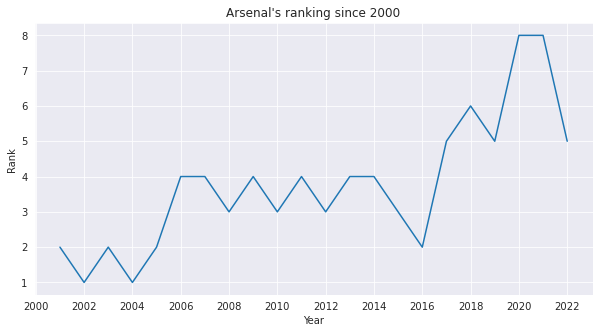

In [121]:
import numpy as np
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(Arsenal.Year, Arsenal.Rk)
ax.set(title="Arsenal's ranking since 2000",
ylabel="Rank")
ax.set_xticks(range(2000, 2023, 2));

In [187]:
r = []
for i in Arsenal["Top Team Scorer"]:
    r.append(i.split("-"))
r

[['Thierry Henry ', ' 17'],
 ['Thierry Henry ', ' 24'],
 ['Thierry Henry ', ' 24'],
 ['Thierry Henry ', ' 30'],
 ['Thierry Henry ', ' 25'],
 ['Thierry Henry ', ' 27'],
 ['Robin van Persie ', ' 11'],
 ['Emmanuel Adebayor ', ' 24'],
 ['Robin van Persie ', ' 11'],
 ['Cesc Fàbregas ', ' 15'],
 ['Robin van Persie ', ' 18'],
 ['Robin van Persie ', ' 30'],
 ['Theo Walcott ', ' 14'],
 ['Olivier Giroud ', ' 16'],
 ['Alexis Sánchez ', ' 16'],
 ['Olivier Giroud ', ' 16'],
 ['Alexis Sánchez ', ' 24'],
 ['Alexandre Lacazette ', ' 14'],
 ['Pierre', 'Emerick Aubameyang ', ' 22'],
 ['Pierre', 'Emerick Aubameyang ', ' 22'],
 ['Alexandre Lacazette ', ' 13'],
 ['Bukayo Saka ', ' 11']]

In [149]:
top = ["Thierry Henry", "Thierry Henry", "Thierry Henry", "Thierry Henry", "Thierry Henry" ,"Thierry Henry",
"Robin van Persie", "Emmanuel Adebayor", "Robin van Persie", "Cesc Fàbregas", "Robin van Persie",
"Robin van Persie", "Theo Walcott", "Olivier Giroud", "Alexis Sánchez", "Olivier Giroud", "Alexis Sánchez",
"Alexandre Lacazette", "Pierre-Emerick Aubameyang", "Pierre-Emerick Aubameyang", "Alexandre Lacazette",
"Bukayo Saka"]

In [163]:
from collections import Counter
x = Counter(top)
x

Counter({'Thierry Henry': 6,
         'Robin van Persie': 4,
         'Emmanuel Adebayor': 1,
         'Cesc Fàbregas': 1,
         'Theo Walcott': 1,
         'Olivier Giroud': 2,
         'Alexis Sánchez': 2,
         'Alexandre Lacazette': 2,
         'Pierre-Emerick Aubameyang': 2,
         'Bukayo Saka': 1})

In [229]:
x = dict(sorted(x.items(), key=lambda x: x[1], reverse=True))
x

{'Thierry Henry': 6,
 'Robin van Persie': 4,
 'Olivier Giroud': 2,
 'Alexis Sánchez': 2,
 'Alexandre Lacazette': 2,
 'Pierre-Emerick Aubameyang': 2,
 'Emmanuel Adebayor': 1,
 'Cesc Fàbregas': 1,
 'Theo Walcott': 1,
 'Bukayo Saka': 1}

In [230]:
goal = {}
for i in r:
    if len(i) == 3:
        goal[i[1]] = int(i[2])
        if goal[i[1]] in goal:
            goal[i[1]] += int(i[2])
    elif i[0] in goal:
        goal[i[0]] += int(i[1])
    else:
        goal[i[0]] = int(i[1])


In [231]:
goal["Emerick Aubameyang "] = 44

In [232]:
goal = dict(sorted(goal.items(), key=lambda x: x[1], reverse=True))
goal

{'Thierry Henry ': 147,
 'Robin van Persie ': 70,
 'Emerick Aubameyang ': 44,
 'Alexis Sánchez ': 40,
 'Olivier Giroud ': 32,
 'Alexandre Lacazette ': 27,
 'Emmanuel Adebayor ': 24,
 'Cesc Fàbregas ': 15,
 'Theo Walcott ': 14,
 'Bukayo Saka ': 11}

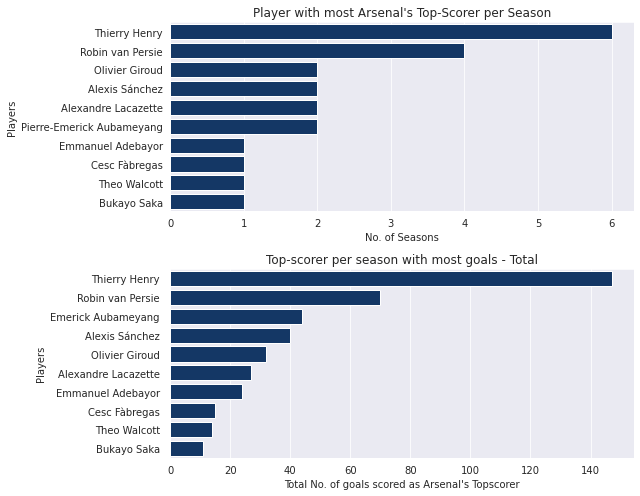

In [303]:
fig, (ax1, ax2) = plt.subplots(figsize=(9,7), nrows=2, ncols=1)

sns.barplot(y=list(x.keys()), x=list(x.values()), orient="h",
color="#063672", ax=ax1)
ax1.set(title="Player with most Arsenal's Top-Scorer per Season",
ylabel="Players", xlabel="No. of Seasons")

sns.barplot(y=list(goal.keys()), x=list(goal.values()), orient="h",
color="#063672", ax=ax2)
ax2.set(title="Top-scorer per season with most goals - Total",
ylabel="Players", xlabel="Total No. of goals scored as Arsenal's Topscorer")
plt.tight_layout();

In [315]:
mu = Arsenal.W.mean()
var = Arsenal.W.var()
mu

21.363636363636363

In [316]:
alpha = (((1-mu)/var) - (1/mu)) * (mu**2)
alpha

-1175.6264996001066

In [317]:
beta = alpha * ((1/mu) - 1)

In [327]:
prob_win = (0 + alpha - 1) / (38 + alpha + beta- 2)
prob_win

61.83227559926598

In [328]:
#mle
470/836

0.562200956937799

0.7931034482758621

In [305]:
Arsenal.D.mean()

8.772727272727273